<a href="https://colab.research.google.com/github/mikealeixogf/RNA_TensorFLow/blob/main/02_classificacao_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aplicação de redes neurais artificiais para classificação de imagens.
> Nesta atividade utilizaremos o TensorFLow e a biblioteca intrínseca Keras que possui datasets de imagens.

> **objetivo**:

Criar um cógido que treine e reconheça padrões, além de predizer qual a classe das imagens testes. 

Plotar figuras das imagens testes e a acuracia em relação ao resultados preditos;



In [ ]:
!pip install tensorflow
!pip install keras 





###  Instalando os pacotes necessários 
> Criando um callback:

Podemos melhorar o nosso código por meio do uso de callbacks para que seja testado após cada época se o treinamento deve continuar ou não, baseado em um valor de erro (loss) desejado.





In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from matplotlib import cm

#passo 5
class meucallback(tf.keras.callbacks.Callback):
  def  on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy')>0.9):
      print('\naccuracy é alta, então cancelando o treino')
      self.model.stop_training = True
 

### Passo 1:

> Carregar os dados do fashion_mnist

O keras tem um banco de dados interno. e o fashion_mnist é um data set


>> plotar a imagem a ser reconhecida




<Figure size 432x288 with 0 Axes>

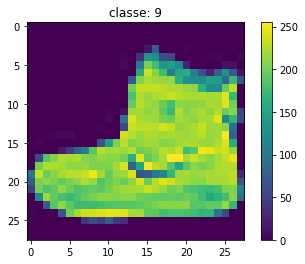

<Figure size 432x288 with 0 Axes>

In [158]:
#passo 1
fashion_mnist = keras.datasets.fashion_mnist #variavel
(treino_imagens, treino_labels), (teste_imagens, test_labels) = fashion_mnist.load_data()

#plot 
plt.imshow(treino_imagens[0])
plt.title(f'classe: {treino_labels[0]}')
plt.colorbar()
plt.figure()



Nome das classes do data set

verificando a quantidade de exemplos do conjunto de treino

In [ ]:
class_names = ['camiseta/top', 'Caça', 'suéter', 'vestidos', 'casacos', 
               'sandalias', 'camisa','tenis','bolsa','bota']
treino_imagens.shape



(60000, 28, 28)

### Passo 2:
 > Separação em casos de treino e teste

>> normalização dos dados de entrada  de acordo com o número máximo de pixels (255)

>> Plotar a imagem


<Figure size 432x288 with 0 Axes>

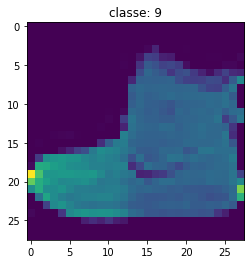

<Figure size 432x288 with 0 Axes>

In [159]:
#passo2

treino_imagens = keras.utils.normalize(treino_imagens,axis=1)
teste_imagens = keras.utils.normalize(teste_imagens, axis = 1)
#plot 
plt.imshow(treino_imagens[0])
plt.title(f'classe: {treino_labels[0]}')
plt.figure()



### Conjunto de imagens em escala de cinza

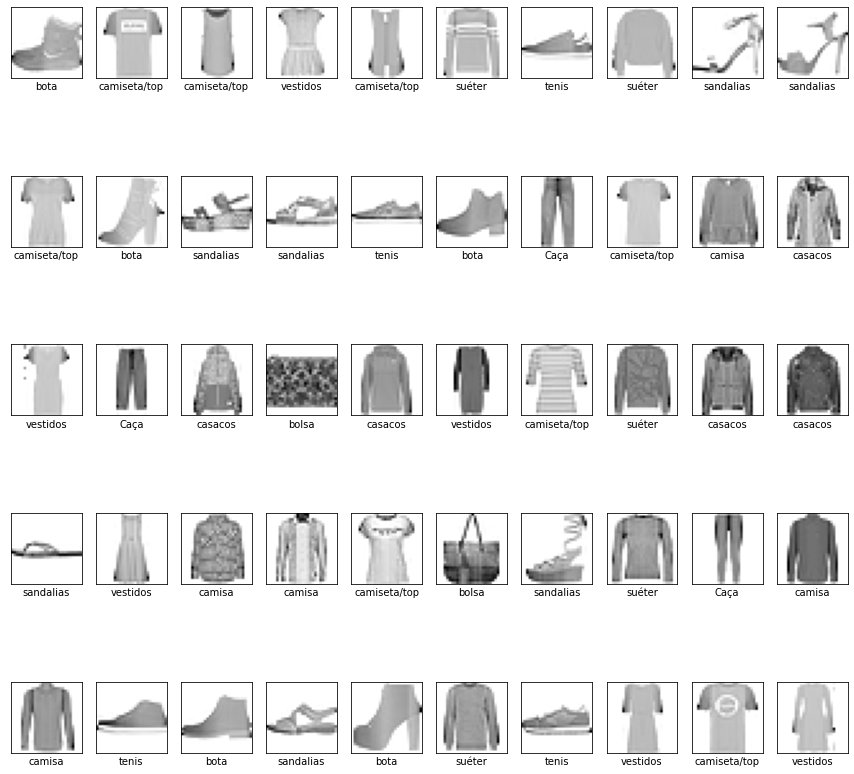

In [160]:
plt.figure(figsize=(15,15))
for i in range(50):
  plt.subplot(5,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('false')
  plt.imshow(treino_imagens[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[treino_labels[i]])
plt.show()


### Passo 3:

 > Definição do modelo da rede (arquitetura)

 >> criando a sequencia de camadas:

 >>> Flatten: Achatada, cujo formato de entrada (comando: input_shape=()) é 28 por 28 px

 >>> dense: camada de ativação (oculta) que garante que o valor de saída seja positivo (tf.nn.relu). 

>>> dense: camada de ativação (output) (tf.nn.softmax) cujo tem 10 classificações possíveis neste caso



In [161]:

#Passo 3

#definindo a arquitetura do modelo
modelo = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(512, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.softmax)                    
])


### Passo 4:

>Treinamento do classificador da Rede 
>> forma como será computada (compile)

>>> Optimizer: otimizador, para que a nossa rede aprenda e modifique os pesos

>>> Loss: Função de erro

>> Define o modelo (exemplo e épocas) do treinamento

>>> fit: Função que recebe a entrada, a saída e a época

>>> epochs: parâmetro que altera o quão a rede vai convergir (aprender ou não)



In [162]:
#passo 4
callbacks = meucallback()
#compilando o modelo
modelo.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

#treinando o modelo
modelo.fit(treino_imagens, treino_labels, epochs = 20, callbacks=[callbacks])



Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4662 - accuracy: 0.8294
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3481 - accuracy: 0.8710
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3097 - accuracy: 0.8841
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2859 - accuracy: 0.8922
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2654 - accuracy: 0.8999
Epoch 6/20
1870/1875 [============================>.] - ETA: 0s - loss: 0.2489 - accuracy: 0.9058
accuracy é alta, então cancelando o treino
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2489 - accuracy: 0.9058


Avalidando o modelo

In [ ]:
# Avaliando o modelo
modelo.evaluate(teste_imagens, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3401 - accuracy: 0.8754


[0.3401036262512207, 0.8754000067710876]

In [163]:
# Predição das imagens
predicao = modelo.predict(teste_imagens)
print(predicao[0])
print(np.argmax(predicao[0]))
print(test_labels[0])

[2.5351810e-06 9.5077759e-08 9.3601091e-07 2.4154629e-06 6.0621585e-07
 1.4161401e-02 4.2436213e-06 3.2185160e-02 3.3715936e-05 9.5360881e-01]
9
9


### Função para plotar a imagem com a classe predita e a classe verdadeira

In [154]:
def plot_image(i,predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid('false')
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color ='blue'
  else:
    color = 'red'
  plt.xlabel('{} {:2.0f}% {}'.format(class_names[predicted_label], 
                                     100*np.max(predictions_array), 
                                     class_names[true_label]), 
                                     color=color)

In [155]:
def plot_value_array(i,predictions_array, true_label):
  predictions_array, true_label= predictions_array[i], true_label[i]
  plt.grid('false')
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Distribuição de classes para o i-ésimo exemplo do conjunto de teste

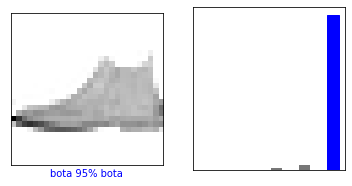

In [166]:
i = 0
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predicao, test_labels, teste_imagens)
plt.subplot(1,2,2)
plot_value_array(i, predicao, test_labels)
plt.show()

### Plotando as imagens e suas respectivas distribuições de classes

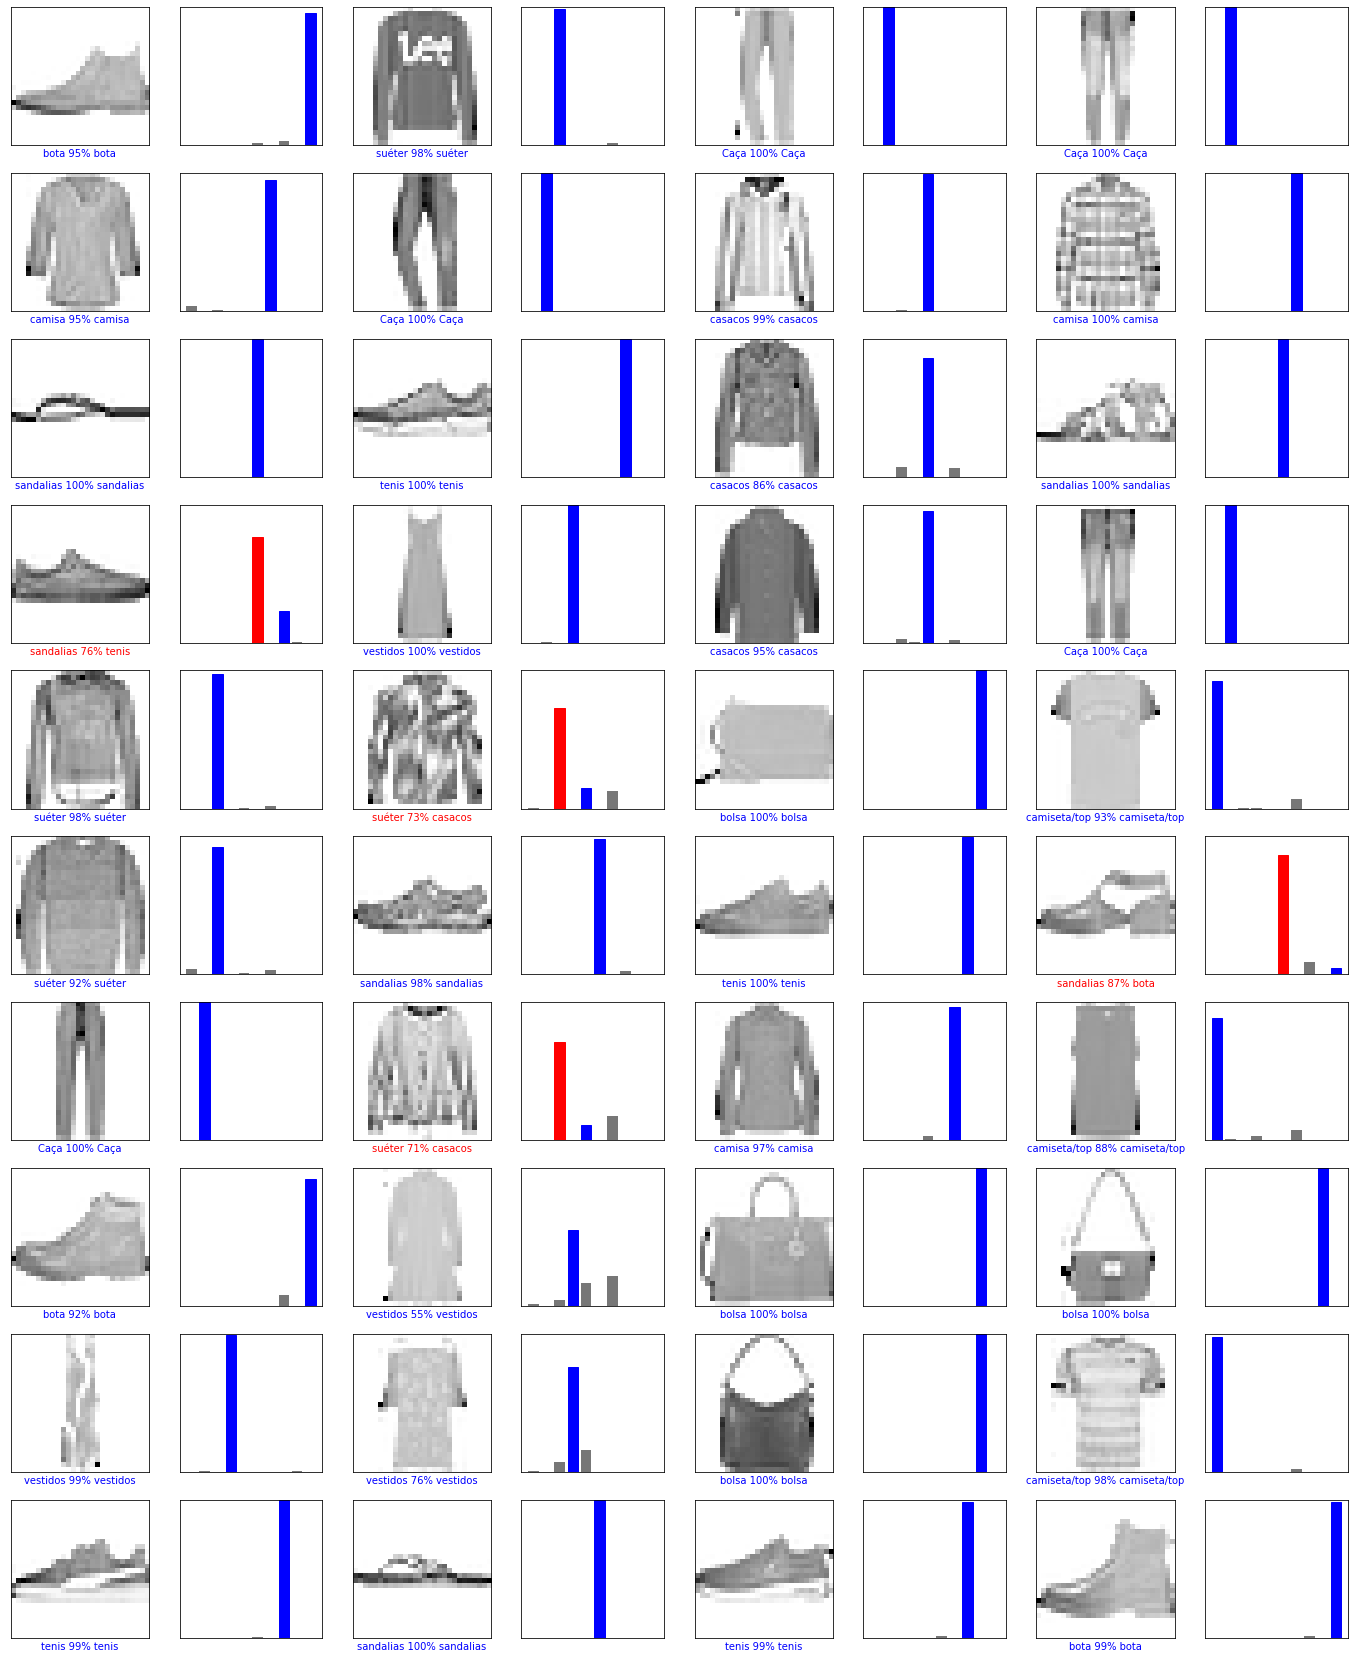

In [212]:
num_rows=10
num_cols=4
num_imagens= num_rows*num_cols

plt.figure(figsize = (3*2*num_cols, 3*num_rows))
for i in  range(num_imagens):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predicao, test_labels, teste_imagens)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predicao, test_labels)
plt.show()
